In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

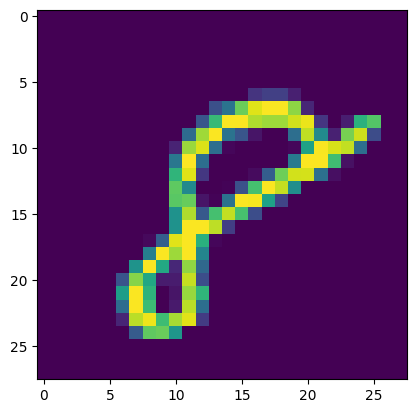

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[59999])

In [14]:
X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [43]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [46]:
history =  model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2824 - accuracy: 0.9189 - val_loss: 0.1447 - val_accuracy: 0.9596
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1191 - accuracy: 0.9637 - val_loss: 0.1187 - val_accuracy: 0.9647
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0830 - accuracy: 0.9743 - val_loss: 0.1069 - val_accuracy: 0.9702
Epoch 4/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0960 - val_accuracy: 0.9693
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0388 - accuracy: 0.9875 - val_loss: 0.1066 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0320 - accuracy: 0.9894 - val_loss: 0.1067 - val_accuracy:

In [47]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [48]:
y_pred = y_prob.argmax(axis=1)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test, y_pred)

0.9754

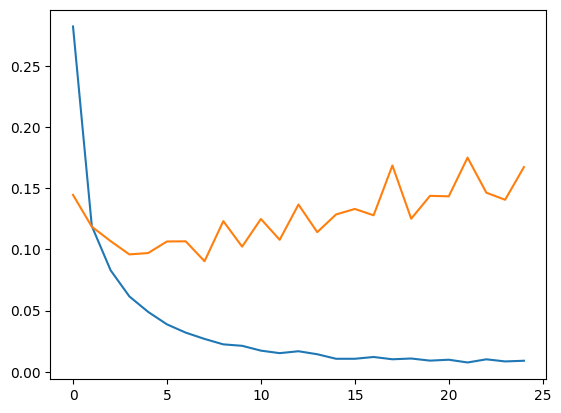

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

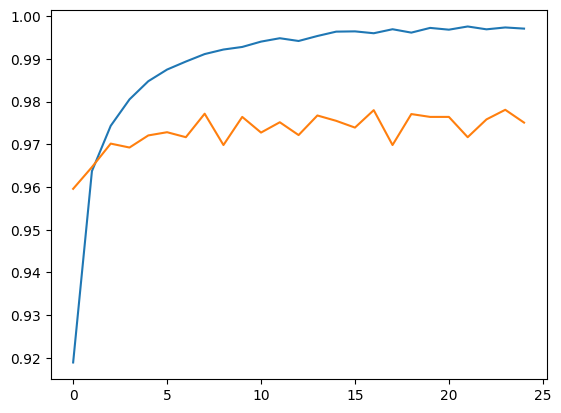

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

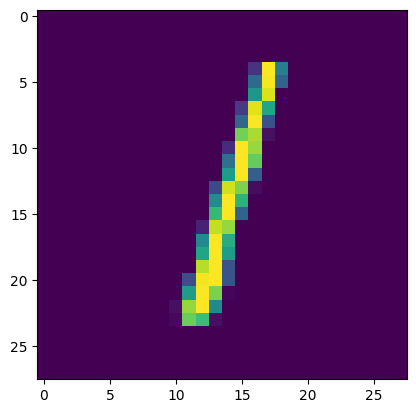

In [60]:
plt.imshow(X_test[2])

In [61]:
model.predict(X_test[2].reshape(1, 28, 28)).argmax(1)

1/1 [==============================] - 0s 30ms/step


array([1])